In [537]:
import pandas as pd
import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#import scipy.stats as stats
#import statsmodels.api as sm
#import statsmodels.stats.api as sms
#from statsmodels.stats.proportion import proportion_confint
#import pylab
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

In [538]:
temp = open('videodata-wgxmwm-x521b2.txt').read().splitlines()
templist = []
for i in temp:
    templist += [i.split(' ')]
data_1_raw = []
for i in templist:
    lst = []
    for j in i:
        if j != '':
            lst += [j]
    data_1_raw += [lst]
    lst = []

In [539]:
data_1 = pd.DataFrame(data_1_raw[1:], columns = data_1_raw[0])
data_1 = data_1.applymap(lambda x: pd.to_numeric(x))

In [540]:
data_1.head()

,time,like,where,freq,busy,educ,sex,age,home,math,work,own,cdrom,email,grade
0,2.0,3.0,3.0,2.0,0.0,1.0,0.0,19.0,1.0,0.0,10.0,1.0,0.0,1.0,4.0
1,0.0,3.0,3.0,3.0,0.0,0.0,0.0,18.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0
2,0.0,3.0,1.0,3.0,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
3,0.5,3.0,3.0,3.0,0.0,1.0,0.0,19.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
4,0.0,3.0,3.0,4.0,0.0,1.0,0.0,19.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0


In [541]:
data_2 = pd.read_csv('data_2.csv')

In [542]:
data_2.T

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
Unnamed: 0,1,2,3,4,5,6,7,8,9,10,...,82,83,84,85,86,87,88,89,90,91
action,0,0,1,0,0,1,1,0,1,1,...,0,0,1,1,1,0,1,1,0,1
adv,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,1,0,1,0,0,0
sim,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
sport,0,0,1,0,0,1,1,1,1,0,...,0,1,0,0,1,1,0,0,1,0
strategy,1,1,1,1,1,1,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
relax,1,0,1,0,1,1,1,1,0,1,...,0,1,1,1,1,0,1,1,0,1
coord,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
challenge,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
master,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [543]:
data_1.describe()

,time,like,where,freq,busy,educ,sex,age,home,math,work,own,cdrom,email,grade
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1.242857,4.076923,21.967033,16.461538,12.153846,14.549451,0.582418,19.516484,0.758242,1.406593,10.373626,0.736264,5.604396,0.791209,3.252747
std,3.777040,10.098659,38.476097,33.896020,32.384126,34.670918,0.495893,1.846093,0.430521,10.354793,19.327958,0.443099,22.647482,0.408697,0.607242
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,0.000000,3.000000,3.000000,3.000000,0.000000,1.000000,1.000000,19.000000,1.000000,0.000000,5.000000,1.000000,0.000000,1.000000,3.000000
75%,1.250000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,14.500000,1.000000,0.000000,1.000000,4.000000
max,30.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.000000,33.000000,1.000000,99.000000,99.000000,1.000000,99.000000,1.000000,4.000000


In [544]:
data_2.describe()

,Unnamed: 0,action,adv,sim,sport,strategy,relax,coord,challenge,master,bored,graphic,time,frust,lonely,rules,cost,boring,friends,point
count,91.00000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,46.00000,0.517241,0.287356,0.172414,0.390805,0.632184,0.666667,0.045977,0.241379,0.287356,0.275862,0.264368,0.482759,0.264368,0.045977,0.195402,0.402299,0.160920,0.022989,0.333333
std,26.41338,0.502599,0.455153,0.379930,0.490759,0.485006,0.474137,0.210649,0.430400,0.455153,0.449539,0.443553,0.502599,0.443553,0.210649,0.398809,0.493204,0.369587,0.150736,0.474137
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.00000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.50000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,91.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [545]:
#Bootstrap of data_1
sample_pool = []
copy = data_1.copy()
for i in range(500):
    sample = copy.sample(replace=True, n = len(copy))
    sample_pool += [sample]

# Scenario 1

In [546]:
# The fraction of students who played a video games in the week prior to they survey.

In [547]:
#Point estimation

In [548]:
data_1['time'] = data_1['time'].replace(99, 0).replace(np.NaN, 0)

In [549]:
num_notplayed = len(data_1[data_1['time']!=0])
num_total = len(data_1)
fraction_point_estimation = num_notplayed / num_total
fraction_point_estimation

0.3695652173913043

In [550]:
# Interval estimation w/ calculation
# N = 314, n = 91

In [551]:
x_bar = fraction_point_estimation

se = np.sqrt((x_bar*(1-x_bar) / (n-1)) * ((N - n)/N))

x_bar - 2*se, x_bar + 2*se

(0.283809718784465, 0.45532071599814367)

In [552]:
# Interval estimation w/ bootstrap simulation

In [553]:
fraction_pool = []
for i in sample_pool:
    i['time'] = i['time'].replace(99, 0).replace(np.NaN, 0)
    num_notplayed = len(i[i['time']!=0])
    num_total = len(i)
    fraction_point_estimation = num_notplayed / num_total
    fraction_pool += [fraction_point_estimation]
ci_low, ci_upp = np.percentile(fraction_pool, 2.5), np.percentile(fraction_pool, 97.5)
ci_low, ci_upp

(0.2717391304347826, 0.4673913043478261)

# Scenario 2

In [554]:
# Frequency of play & the fact of exam affect the frequency

In [555]:
data_1['freq'] = data_1['freq'].replace(np.NaN, 99)

In [556]:
data_1.groupby('freq')['time'].mean()

freq
1.0     4.444444
2.0     2.539286
3.0     0.055556
4.0     0.043478
99.0    0.000000
Name: time, dtype: float64

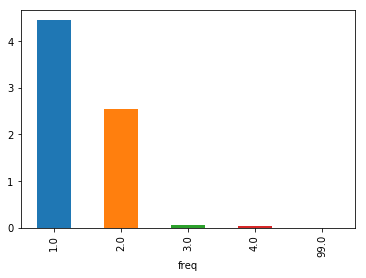

In [557]:
data_1.groupby('freq')['time'].mean().plot(kind = 'bar')

自己猜

In [558]:
#exam 

# Scenario 3

In [559]:
# Interval average amount of time spent playing video games in the week priors to the survey

# Overall shape of the distribution

In [560]:
#w/ formula in slide N = 314, n = 91

In [561]:
s = data_1['time'].std()
N = 314
n = 91
x_bar = data_1['time'].mean()
se = (s/np.sqrt(n)) * np.sqrt((N-n)/N)

x_bar-2*se, x_bar+ 2 * se

(0.5652878396892033, 1.8934078124847096)

In [562]:
#w / bootstrap Simulation

In [563]:
mean_time = []
for i in sample_pool:
    i['time'] = i['time'].replace(99, 0).replace(np.NaN, 0)
    mean_time += [i['time'].mean()]
np.percentile(mean_time, 2.5), np.percentile(mean_time, 97.5)

(0.6553260869565218, 2.0850271739130415)

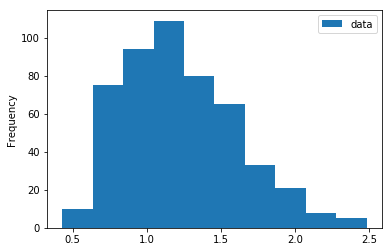

In [564]:
pd.DataFrame( 
    {'data':mean_time}
).plot(kind = 'hist')

# Scenario 4

# 不确定， 跳过

In [565]:
# Do you think students enjoy the game?

# list of the most important reason students like or dislike video games

# Nonrespondent who asked to skip the question

In [566]:
like_reason = data_2.iloc[0:,[i for i in range(1,12)]]
dislike_reason = data_2.iloc[0:, [i for i in range(12, 22)]]

In [567]:
like_reason.drop(columns = 'other').sum().sort_values(ascending = False)

relax        58.0
strategy     55.0
action       45.0
sport        34.0
master       25.0
adv          25.0
bored        24.0
challenge    21.0
sim          15.0
coord         4.0
dtype: float64

In [568]:
dislike_reason.drop(columns = 'other2').sum().sort_values(ascending = False)

time       42.0
cost       35.0
point      29.0
frust      23.0
graphic    23.0
rules      17.0
boring     14.0
lonely      4.0
friends     2.0
dtype: float64

In [569]:
like_reason.other.value_counts()

                 83
Brainless         1
excitement        1
fun               1
like sports       1
competiveness     1
addictive         1
love it           1
lowers stress     1
Name: other, dtype: int64

In [570]:
dislike_reason.other2.value_counts()

                       82
unproductive            4
gives me blisters       1
too realistic           1
hate losing             1
do other things         1
the computer cheats     1
Name: other2, dtype: int64

In [571]:
#other reasons are not dominant, so we omit it

In [572]:
#Education reason

In [573]:
len(data_1[data_1['educ'] == 1]) #37 students play for educational reason

37

# Scenario 5

In [574]:
#differences between those who like to play video games
#andthose who don’t.

#use the questions in the last part of the survey, 
#and make comparisons between male and female students, 
#those who work for pay and those 
#who don’t, those who own a computer and those who don’t

In [575]:
#Like to play: 1=never played, 2=very much, 3=somewhat,
# 4=not really, 5=not at all.

#Sex : 1=male, 0=female.

In [576]:
# like to play 2&3 vs 1&4&5&99&null

In [577]:
like = data_1[(data_1['like']==2) \
             |(data_1['like']==3)]
notlike = data_1[(data_1['like'] == 1) | \
              (data_1['like'] == 4) |\
              (data_1['like'] == 5) |\
              (data_1['like'] == 99) |\
              (data_1['like'].isnull())]

In [578]:
prop_sex_like = like.groupby('sex')['sex'].size() / data_1.groupby('sex')['sex'].size()

In [579]:
prop_sex_like

sex
0.0    0.684211
1.0    0.811321
Name: sex, dtype: float64

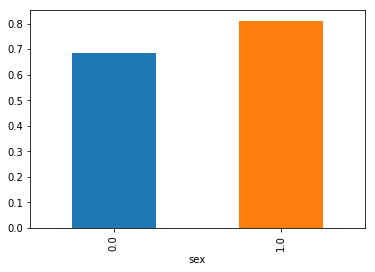

In [580]:
prop_sex_like.plot(kind = 'bar')

In [581]:
prop_own_like = like.groupby('own')['own'].size() / data_1.groupby('own')['own'].size()

In [582]:
prop_own_like

own
0.0    0.875000
1.0    0.716418
Name: own, dtype: float64

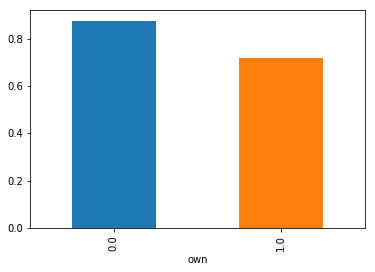

In [583]:
prop_own_like.plot(kind = 'bar')

In [584]:
prop_sex_notlike = notlike.groupby('sex')['sex'].size() /\
data_1.groupby('sex')['sex'].size()

In [585]:
prop_sex_notlike

sex
0.0    0.315789
1.0    0.188679
Name: sex, dtype: float64

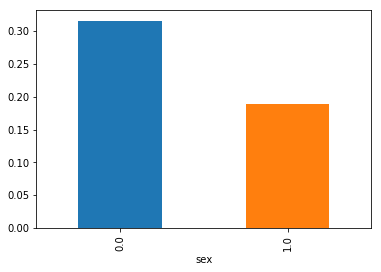

In [586]:
prop_sex_notlike.plot(kind = 'bar')

In [587]:
prop_own_notlike = notlike.groupby('own')['own'].size()/ data_1.groupby('own')['own'].size()

In [588]:
prop_own_notlike

own
0.0    0.125000
1.0    0.283582
Name: own, dtype: float64

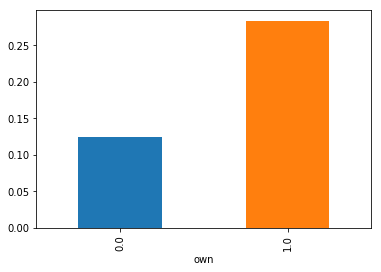

In [589]:
prop_own_notlike.plot(kind = 'bar')

In [590]:
#Graphical display and cross-tabulations 
#are particularly helpful in making these kinds of comparisons.

In [591]:
table = pd.DataFrame(
        {
            'sex_like': prop_sex_like,
            'sex_notlike': prop_sex_notlike,
            'own_like': prop_own_like,
            'own_notlike': prop_own_notlike
        }
)

In [592]:
table

,sex_like,sex_notlike,own_like,own_notlike
own,,,,
0.0,0.684211,0.315789,0.875000,0.125000
1.0,0.811321,0.188679,0.716418,0.283582


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d4097b8>],
      dtype=object)

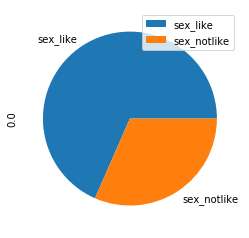

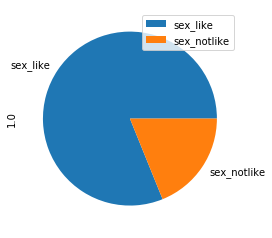

In [593]:
table.iloc[0:1,[0,1]].T.plot(kind = 'pie',subplots=True)
table.iloc[1:,[0,1]].T.plot(kind = 'pie',subplots=True)

#0 female, 1 male

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d4e6978>],
      dtype=object)

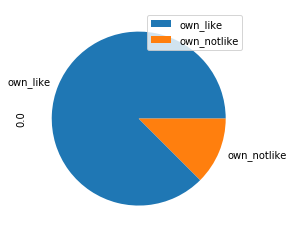

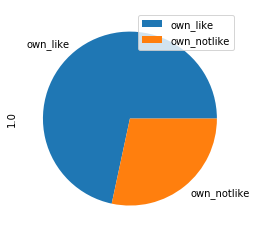

In [594]:
table.iloc[0:1,[2,3]].T.plot(kind = 'pie',subplots=True)
table.iloc[1:,[2,3]].T.plot(kind = 'pie',subplots=True)

#0 notown, 1 own

# Scenario 6

In [595]:
# Investigate the grade assignments of the gaming

In [596]:
data_1.groupby('time')['grade'].mean()

time
0.0     3.140351
0.1     4.000000
0.5     3.400000
1.0     3.400000
1.5     3.000000
2.0     3.642857
3.0     3.000000
4.0     4.000000
5.0     4.000000
14.0    2.500000
30.0    3.000000
Name: grade, dtype: float64

In [597]:
data_1.groupby('freq')['grade'].mean()

freq
1.0     3.444444
2.0     3.500000
3.0     2.888889
4.0     3.217391
99.0    3.153846
Name: grade, dtype: float64

In [598]:
data_1.groupby('like')['grade'].mean()

like
1.0     4.000000
2.0     3.260870
3.0     3.239130
4.0     3.461538
5.0     2.857143
99.0    3.000000
Name: grade, dtype: float64

In [599]:
#Bootstrap data to confirm

In [600]:
time_mean = []
freq_mean = []
like_mean = []
for i in sample_pool:
    time_mean += [data_1.groupby('time')['grade'].mean()]
    freq_mean += [data_1.groupby('freq')['grade'].mean()]
    like_mean += [data_1.groupby('like')['grade'].mean()]
print(sum(time_mean)/500, sum(freq_mean)/500, sum(like_mean)/500)

time
0.0     3.140351
0.1     4.000000
0.5     3.400000
1.0     3.400000
1.5     3.000000
2.0     3.642857
3.0     3.000000
4.0     4.000000
5.0     4.000000
14.0    2.500000
30.0    3.000000
Name: grade, dtype: float64 freq
1.0     3.444444
2.0     3.500000
3.0     2.888889
4.0     3.217391
99.0    3.153846
Name: grade, dtype: float64 like
1.0     4.000000
2.0     3.260870
3.0     3.239130
4.0     3.461538
5.0     2.857143
99.0    3.000000
Name: grade, dtype: float64
